<a href="https://colab.research.google.com/github/MargieC97/help-/blob/main/Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install qiskit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.6 MB/s eta 0:00:00


In [2]:
pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 79.0 MB/s eta 0:00:00


In [ ]:
pip install 'qiskit[visualization]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=012cf65e501923639ed3e10ed507118f3b43a26c3809962d203cbe83508a5293
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


Statevector([0.5-0.5j, 0.5+0.5j],
            dims=(2,))
           ┌──────┐      ░      ┌───┐ ░ ┌─┐    ░                        »
   qb_1_0: ┤ √Xdg ├──────░───■──┤ H ├─░─┤M├────░────────────────────────»
           └┬───┬─┘      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░                        »
   qb_1_1: ─┤ H ├────■───░─┤ X ├──────░──╫─┤M├─░────────────────────────»
            └───┘  ┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ ┌────── ┌───┐ ───────┐ »
bobsqubit: ────────┤ X ├─░────────────░──╫──╫──░─┤ If-0  ┤ X ├  End-0 ├─»
                   └───┘ ░            ░  ║  ║  ░ └──╥─── └───┘ ───────┘ »
                                         ║  ║    ┌──╨──┐                »
   cb_0: 1/══════════════════════════════╩══╬════╡ 0x1 ╞════════════════»
                                         0  ║    └─────┘                »
   cb_1: 1/═════════════════════════════════╩═══════════════════════════»
                                            0                           »
«                                  
«   qb_1_0: ───────

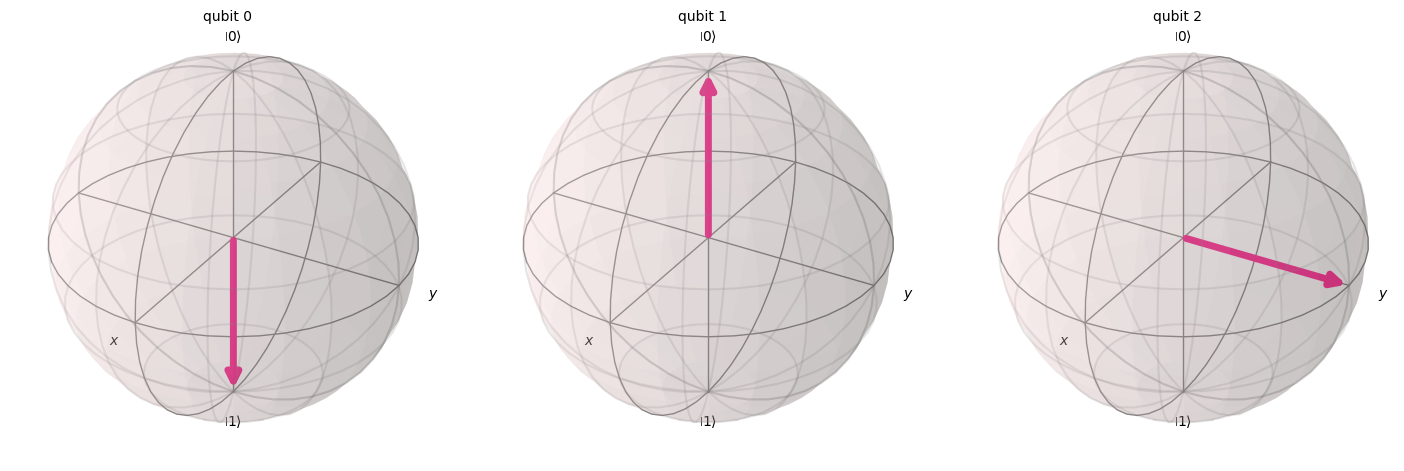

In [64]:
from qiskit import *
from qiskit.circuit.random import random_circuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector


def get_results(qc):
  sim = AerSimulator()
  qc.save_statevector()
  qc_transpiled = transpile(qc, sim)
  out_vector = sim.run(qc).result().get_statevector()
  return out_vector

def teleportation_initialize(bobsqubit):
  psi = random_circuit(1, 1)
  psi_1 = Statevector(psi)
  print(psi_1)
  #the above initializes a random state as the first qubit, which will be our
  #psi - the quantum state we wish to teleport - the print command allows us to
  #visualize the state which will be helpful for verifying the result at the end
  qb_1 = QuantumRegister(2, name="qb_1")
  cb_0 = ClassicalRegister(1, name = "cb_0")
  cb_1 = ClassicalRegister(1, name="cb_1")
  qc_1 = QuantumCircuit(qb_1, bobsqubit, cb_0, cb_1)
  #the above creates a 3 qubit, 2 classical bit circuit that we will add our
  #random psi onto
  qc = qc_1.compose(psi, qubits=[0])
  return qc

def bell_pair(qc):
  #make sure we entagle the correct two qubits
  qc.h(1)
  qc.cx(1,2)
  qc.barrier()
  return qc

def Alice(qc):
  qc.cx(0,1)
  qc.h(0)
  qc.barrier()
  qc.measure(0,0)
  qc.measure(1,1)
  qc.barrier()
  return qc

def Bob(qc):
  with qc.if_test((qc.cregs[0],1)) as _:
    qc.x([2])
  with qc.if_test((qc.cregs[1],1)) as _:
    qc.z([2])
  return(qc)

bobsqubit = QuantumRegister(1, name="bobsqubit")
qc = teleportation_initialize(bobsqubit)
qc = bell_pair(qc)
qc = Alice(qc)
qc = Bob(qc)
print(qc)
#in order to visualize our results, lets run the get results function - we can
#then print out our states on the Bloch sphere
out_vector = get_results(qc)
out_vector.draw(output='bloch')

